In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""

Plot slope between temperature and albedo with elevation for eight regions.

"""

# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Define path
path = '/Users/jryan4/Dropbox (University of Oregon)/research/clouds/data/'

# Define path to save
savepath = '/Users/jryan4/Dropbox (University of Oregon)/research/clouds/'

# Define slopes and interceptss
ds1 = xr.open_dataset(path + '/empirical_albedo_model.nc')

# Set some values to NaN
ds1 = ds1.where(ds1['mean_temp'] != -999)

# Define summer albedo and temp. data
ds2 = xr.open_dataset(path + '/temp_albedo_summer_climatologies.nc')

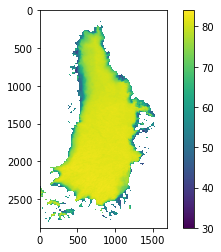

In [4]:
plt.imshow(ds2['albedo'][:,:,0])
plt.colorbar()

In [5]:
# Calculate mean temperature for common reference period (2015-2020)
reference_temp = np.mean(ds2['t2m'][:,:,12:], axis=2)

# Set some values to NaN
reference_temp = reference_temp.where(reference_temp != -999)
reference_temp = reference_temp.where(ds2['mask'] != 0)

# Normalize
normalized_temp = ds1['mean_temp'] - np.nanmean(reference_temp)

In [6]:
# Define 2.5 K bins
bins = np.arange(-7.5, 20, 2.5)

mean_slop = []
mean_temp = []
mean_inter = []
for i in range(len(bins) - 1):
    
    # Define mask
    temp_mask = (normalized_temp > bins[i]) & (normalized_temp < bins[i+1])

    # Get values
    mean_slop.append(np.nanmedian(ds1['slope'].where(temp_mask == 1)))
    mean_temp.append(np.nanmedian(normalized_temp.where(temp_mask == 1)))
    mean_inter.append(np.nanmedian(ds1['intercept'].where(temp_mask == 1)))

In [7]:
# Remove NaNs
mask = np.isfinite(ds1['slope'])

# Flatten
flat_slope = np.array(ds1['slope'])[mask]
flat_temp = np.array(normalized_temp)[mask]

# Remove spurious temp values
temp_mask = flat_temp < 20

# Mask again
flat_slope = flat_slope[temp_mask]
flat_temp = flat_temp[temp_mask]

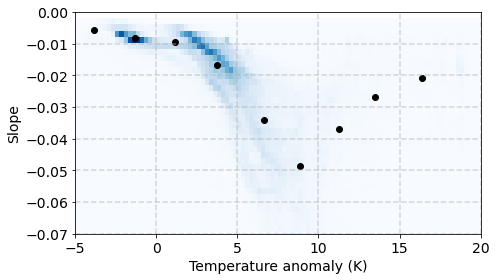

In [13]:
# Plot
fig, (ax1) = plt.subplots(figsize=(7, 4))
ax1.hist2d(flat_temp, flat_slope / 100, bins=100, cmap='Blues')
ax1.scatter(mean_temp, np.array(mean_slop) / 100, c='k')
ax1.set_ylabel('Slope', fontsize=14)
ax1.set_xlabel('Temperature anomaly (K)', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.grid(ls='dashed', lw=1.5, alpha=0.5)
ax1.set_xlim(-5, 20)
ax1.set_ylim(-0.07, 0)
fig.tight_layout()

plt.savefig(savepath + 'revised-manuscript/supp_figures/fig_sx_albedo_vs_temp.png', facecolor='w', transparent=False, dpi=200)

In [167]:
# Make bins
bin_tuple = pd.IntervalIndex.from_tuples([(-7.5, -5), (-5, -2.5), (-2.5, 0), (0, 2.5), (2.5, 5), (5, 7.5), (7.5, 10), (10, 12.5), (12.5, 15), (15, 17.5)])
bins_interval = pd.cut(bins, bin_tuple)

# Save as csv
df = pd.DataFrame(list(zip(bins_interval[2:], mean_slop[1:])), columns=['bin', 'slope'])
#df.to_csv(path + 'empirical_albedo_model.csv', index=False)

In [164]:
df

,bin,slope
0,"(-5.0, -2.5]",-0.582315
1,"(-2.5, 0.0]",-0.819343
2,"(0.0, 2.5]",-0.959314
3,"(2.5, 5.0]",-1.676488
4,"(5.0, 7.5]",-3.415957
5,"(7.5, 10.0]",-4.861516
6,"(10.0, 12.5]",-3.685339
7,"(12.5, 15.0]",-2.688909
8,"(15.0, 17.5]",-2.085592
